# Import Pandas and READ CSV file

In [78]:
import pandas as pd
apps = pd.read_csv('apps.csv')
apps


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [79]:
apps.index[-1]

9658

## DATA CLEANING
The price and installs columns contain characters that have to be cleaned and restructured. Using the for loop we replace the character symbols from the dataframe column values. After the charcters are removed, we check the data types of the columns. Since the column mixed input types it was categorized as a object data type


In [80]:
characters_to_remove=['$', '+',',']
columns_to_clean = ['Price', 'Installs']

for char in characters_to_remove:
    for col in columns_to_clean:
        apps[col]= apps[col].apply(lambda x : x.replace(char,''))
apps = apps.drop_duplicates(subset=["App","Genres"])

apps.isnull().sum()
apps=apps.dropna()
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7021 non-null   int64  
 1   App             7021 non-null   object 
 2   Category        7021 non-null   object 
 3   Rating          7021 non-null   float64
 4   Reviews         7021 non-null   int64  
 5   Size            7021 non-null   float64
 6   Installs        7021 non-null   object 
 7   Type            7021 non-null   object 
 8   Price           7021 non-null   object 
 9   Content Rating  7021 non-null   object 
 10  Genres          7021 non-null   object 
 11  Last Updated    7021 non-null   object 
 12  Current Ver     7021 non-null   object 
 13  Android Ver     7021 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 822.8+ KB


### Change the Data type for Price and Installs columns


In [81]:
apps['Price'] = apps['Price'].astype(float)

apps['Installs'] = apps['Installs'].astype(float)
print(apps[['Installs','Price']].dtypes)

Installs    float64
Price       float64
dtype: object


## Exploring app categories
We check the number of unique app categories present in our data set and the type of apps categories that are dominating. Here see there are 33 unique categories. From the graph, we see that Family apps have the highest market popularity. 

In [82]:
num_category= len(apps['Category'].unique())
print('number of categories = ',num_category)

number of categories =  33


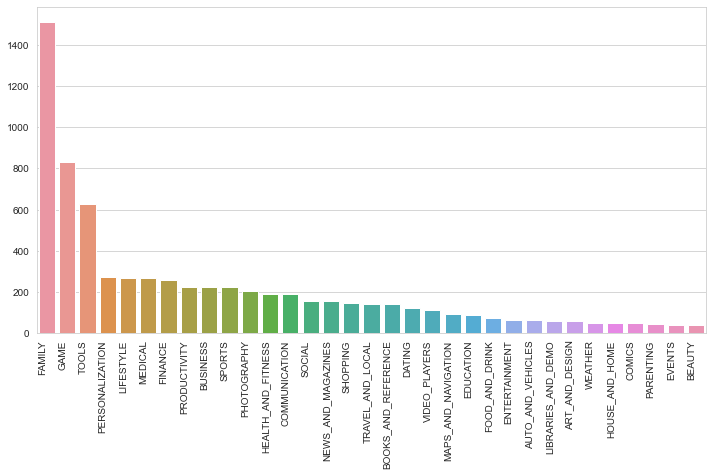

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12,6))

num_apps_in_category = apps['Category'].value_counts()
sns.barplot(x=num_apps_in_category.index, y=num_apps_in_category.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()


# App rating distribution
Here we explore how the apps perform based on their ratings. The ratings is on a scale of 1 to 5. 
We find out the average rating of apps in all categories is 4.17. The histogram is skewed to the left, which shows that majority of apps are highly rated with a few exceptions in the low rated apps. The kde parameter in the histplot is set to True to show the slope of the distribution.

The average app rating is  4.160703603475289


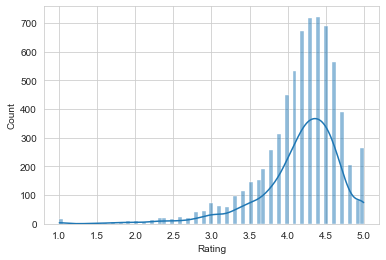

In [84]:
avg_app_rating= apps['Rating'].mean()
print('The average app rating is ', avg_app_rating)
sns.histplot(x='Rating', data = apps, kde=True)

plt.show()

# Size and Price of App
Exploring app size and app price. If the app size is too large it may be difficult and expensive for users to download. This may be a turn off for some users before they even get the chance to experience the app.
Where as, some users also expect their apps to be free or cheap especially if developing worlds are part of your target market. this is due to the slow nature of internets, interest rates and earning power.
We have to do comparative analysis to determine whether:
1. Does the size of an app affect it's rating?
2. Does the price of an app affect it's rating?
3. Do users prefer free apps to paid apps?

We discover that most of top rated apps with rating above 4, average from 2MB to 20MB.  We also find that the price of majority of the apps are below $10.

     Unnamed: 0                App Category  Rating  Reviews  Size  \
839        1050  Citibanamex Movil  FINANCE     3.6    52306  42.0   
841        1052        KTB Netbank  FINANCE     3.8    42644  19.0   
842        1053    Mobile Bancomer  FINANCE     4.2   278082  70.0   
843        1054      Nedbank Money  FINANCE     4.2     6076  32.0   
844        1055           SCB EASY  FINANCE     4.2   112656  93.0   

       Installs  Type  Price Content Rating   Genres   Last Updated  \
839   5000000.0  Free    0.0       Everyone  Finance  July 27, 2018   
841   5000000.0  Free    0.0       Everyone  Finance  June 28, 2018   
842  10000000.0  Free    0.0       Everyone  Finance  July 30, 2018   
843    500000.0  Free    0.0       Everyone  Finance  July 28, 2018   
844   5000000.0  Free    0.0       Everyone  Finance  July 19, 2018   

      Current Ver   Android Ver  
839        20.1.0    5.0 and up  
841          8.18    4.2 and up  
842         10.78  4.0.3 and up  
843  4.1.1-0-pro

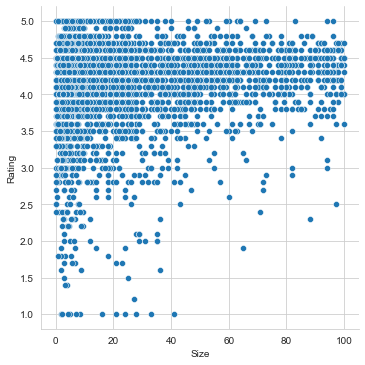

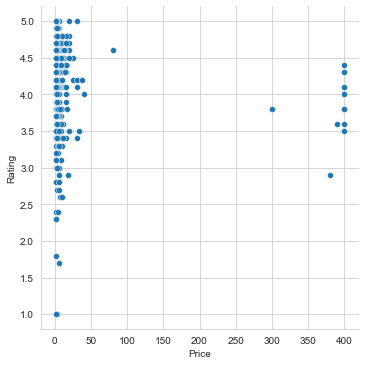

In [85]:
apps_with_size_and_rating_present = apps.dropna(subset=['Size','Rating'])

large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)
print(large_categories.head())
sns.relplot(x='Size',y='Rating', data=large_categories)
plt.show()

paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']
sns.relplot(x='Price', y='Rating', data= paid_apps)
plt.show()

# Relationship Between App Category and App Price.
There are many factors to consider when selecting the right pricing strategy for any product. This is true for mobile apps too. It is always important to consider the willingness of your customer to pay for your app. A wrong pricing strategy could turn off your customer before the download even happens. Potential customers an app that too many ads on their interface.
Different categories also demand different price. Some apps that are simpple and used daily, like the calculator, should remain free. It will however make sense to charge for a highly specialized medical app that dignoses diabetic patients

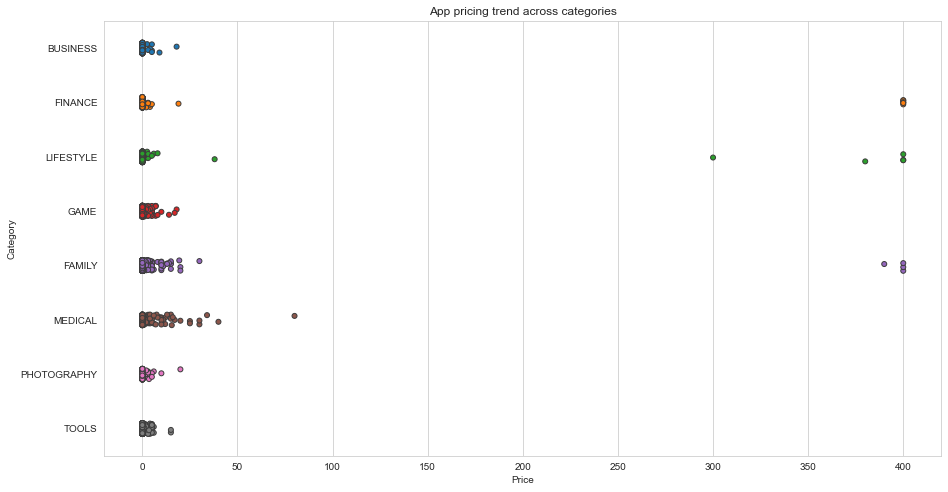

In [86]:
top_8_cats=apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY','MEDICAL', 'TOOLS', 'FINANCE',
                            'LIFESTYLE','BUSINESS'])]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.stripplot(x = top_8_cats["Price"], y = top_8_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
plt.show()

# Filtering Out Expensive Apps In Top 8 Categories
From the visulization above, it appears that there are some app categories with very expensive apps( apps more than $100). We need to filter them out and redo our visualization. We subset the top 8 categories by by selectin the apps whose price is less than $100.

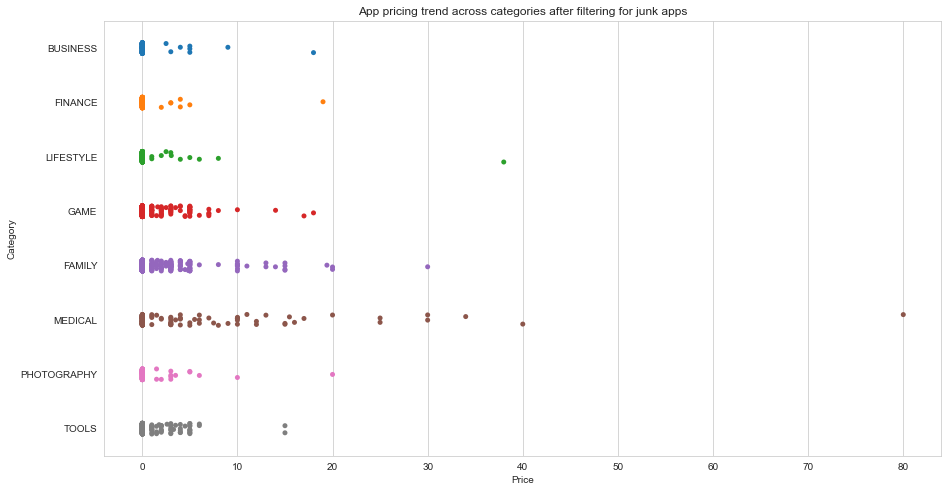

In [87]:

apps_under_100 =top_8_cats[top_8_cats["Price"] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100)
ax.set_title('App pricing trend across categories after filtering for junk apps')
plt.show()

#  Merge Reviews dataframe from the user_reviews csv file

In [94]:
reviews = pd.read_csv("user_reviews.csv")
reviews.tail(5)

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [95]:
app_reviews = pd.merge(apps,reviews, on='App')
app_reviews

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41145,5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.0,10000000.0,Free,0.0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,This turned better I expected tbh I'm glad. I'...,Positive,0.330000,0.707778
41146,5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.0,10000000.0,Free,0.0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,I like apartments n stuffs minus players Many ...,Negative,-0.181997,0.505373
41147,5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.0,10000000.0,Free,0.0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,Hey I've playing year half last year I took 2 ...,Positive,0.002721,0.391497
41148,5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.0,10000000.0,Free,0.0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,"Annoying loading. It stopped 80 percent, data ...",Negative,-0.275000,0.720000


In [100]:
app_reviews = app_reviews.dropna(subset=['Sentiment', 'Review'])
app_reviews.info()
app_reviews.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24069 entries, 0 to 41149
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              24069 non-null  int64  
 1   App                     24069 non-null  object 
 2   Category                24069 non-null  object 
 3   Rating                  24069 non-null  float64
 4   Reviews                 24069 non-null  int64  
 5   Size                    24069 non-null  float64
 6   Installs                24069 non-null  float64
 7   Type                    24069 non-null  object 
 8   Price                   24069 non-null  float64
 9   Content Rating          24069 non-null  object 
 10  Genres                  24069 non-null  object 
 11  Last Updated            24069 non-null  object 
 12  Current Ver             24069 non-null  object 
 13  Android Ver             24069 non-null  object 
 14  Review                  24069 non-null

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
41145,5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.0,10000000.0,Free,0.0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,This turned better I expected tbh I'm glad. I'...,Positive,0.330000,0.707778
41146,5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.0,10000000.0,Free,0.0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,I like apartments n stuffs minus players Many ...,Negative,-0.181997,0.505373
41147,5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.0,10000000.0,Free,0.0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,Hey I've playing year half last year I took 2 ...,Positive,0.002721,0.391497
41148,5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.0,10000000.0,Free,0.0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,"Annoying loading. It stopped 80 percent, data ...",Negative,-0.275000,0.720000
41149,5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.0,10000000.0,Free,0.0,Teen,Role Playing,"July 3, 2018",1.021.10,4.1 and up,Boring graphics great. Although I praise somew...,Positive,0.060000,0.550000
